In [1]:
import pandas as pd
data = pd.read_csv('cybersecurity_attacks.csv')
data.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


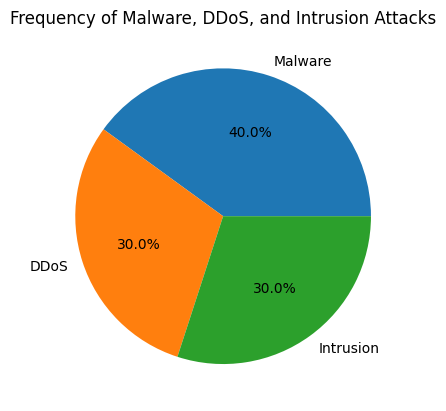

In [5]:
Frequency of each type of attack


data = ['Malware', 'DDoS', 'Malware', 'Intrusion', 'DDoS', 'Malware', 'Intrusion', 'DDoS', 'Malware', 'Intrusion']

# Count the frequency of each attack type
attack_counts = Counter(data)

# Get the attack types and their corresponding frequencies
attacks = list(attack_counts.keys())
frequencies = list(attack_counts.values())

# Create the pie chart
plt.pie(frequencies, labels=attacks, autopct='%1.1f%%')

# Title for the chart
plt.title('Frequency of Malware, DDoS, and Intrusion Attacks')

# Show the chart
plt.show()



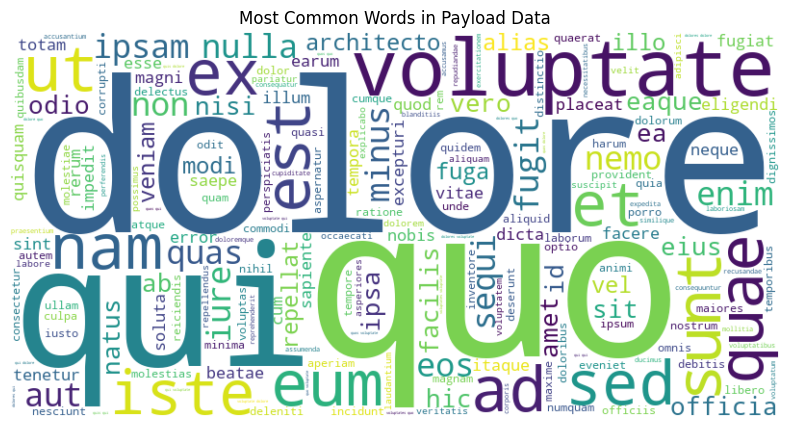

In [11]:
Most common words found in the payload data

# Tokenize the text (split into words)
words = word_tokenize(payload_data.lower())

# Remove stopwords (common words like "the", "and", "is", etc.)
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Join the filtered words back into a single string
filtered_text = ' '.join(filtered_words)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title("Most Common Words in Payload Data")
plt.show()


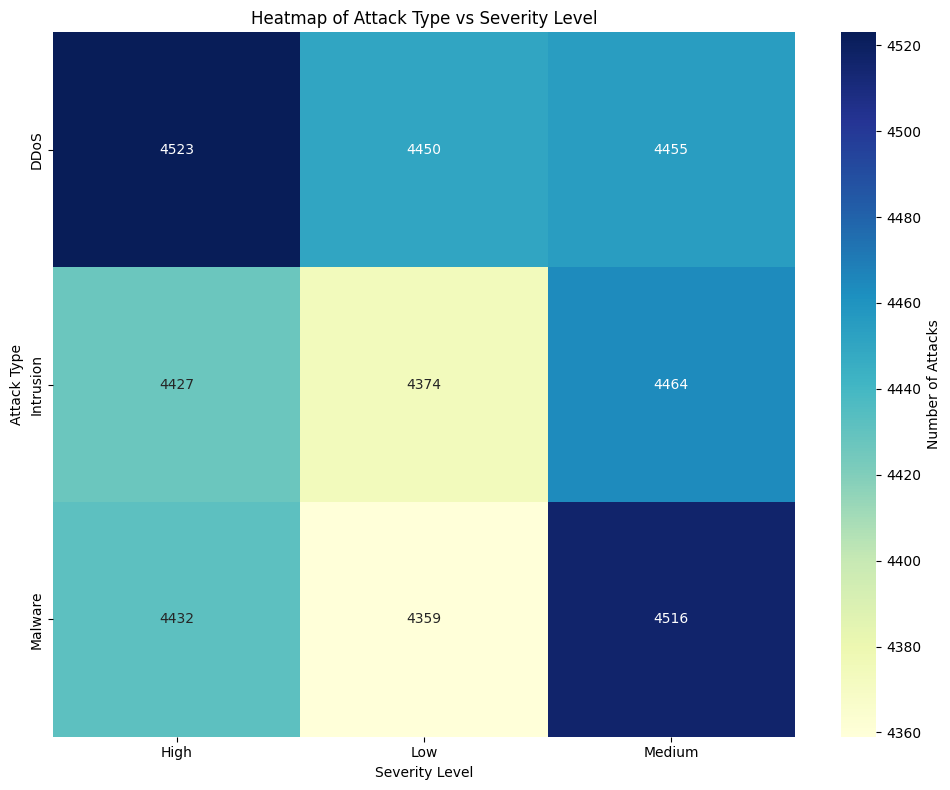

In [20]:
Heat map of attack type and severity level

# Create a pivot table that counts occurrences of each combination of attack type and severity level
heatmap_data = pd.crosstab(df['Attack Type'], df['Severity Level'])

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Number of Attacks'})

# Add title and labels
plt.title('Heatmap of Attack Type vs Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Attack Type')

# Display the heatmap
plt.tight_layout()
plt.show()





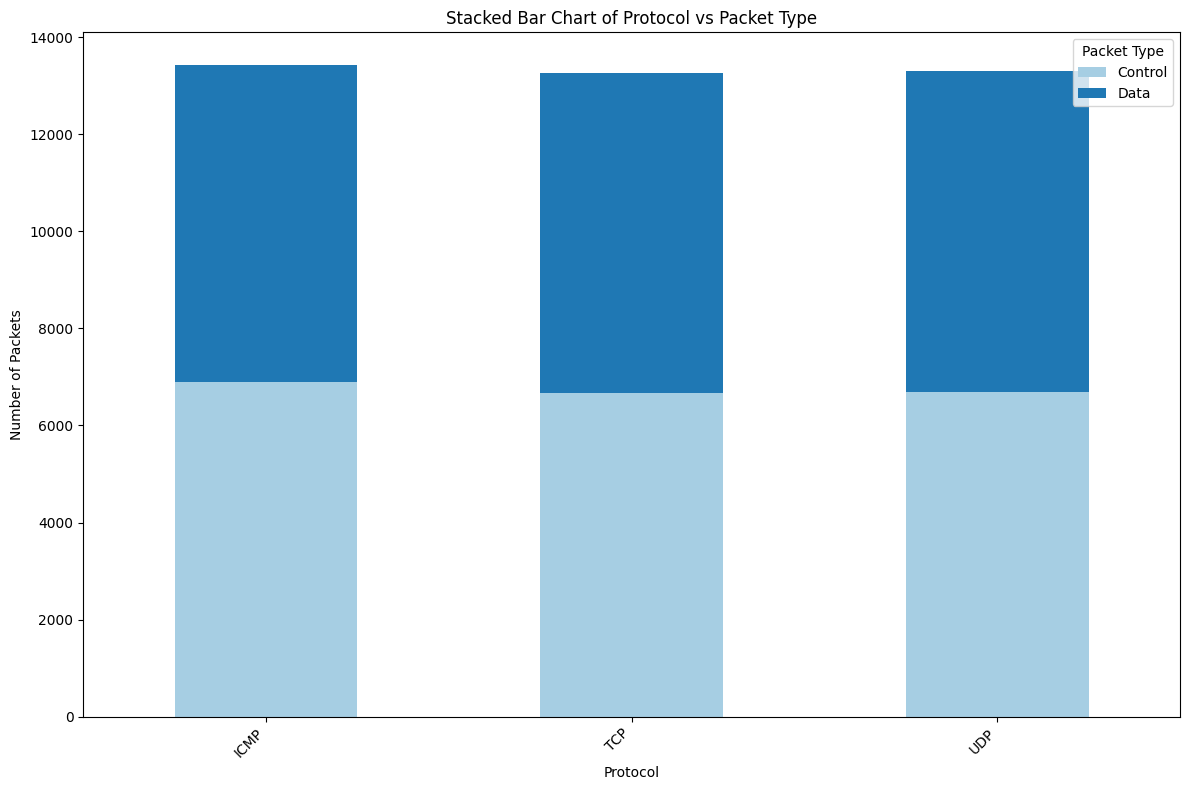

In [23]:
# Group by 'Protocol' and 'Packet Type' and count occurrences
protocol_packet_counts = df.groupby(['Protocol', 'Packet Type']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
protocol_packet_counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Paired.colors)

# Add labels and title
plt.title('Stacked Bar Chart of Protocol vs Packet Type')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


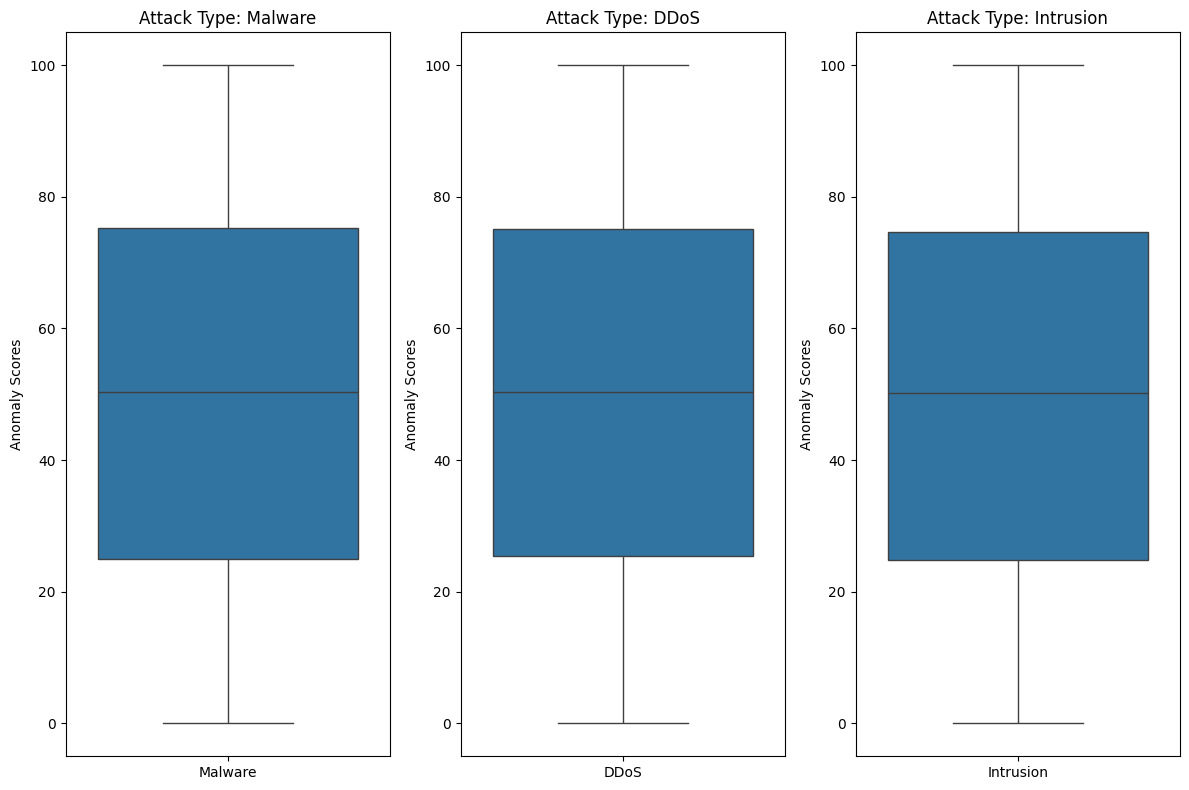

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'attacks.csv' with the path to your actual file)
df = pd.read_csv('cybersecurity_attacks.csv')

# Clean up column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# List of unique attack types
attack_types = df['attack type'].unique()

# Create a figure with a subplot for each attack type
plt.figure(figsize=(12, 8))  # Adjust the size of the figure

# Loop over each attack type to create an individual box plot
for i, attack in enumerate(attack_types):
    plt.subplot(1, len(attack_types), i + 1)  # Creates a subplot in a 1-row grid
    sns.boxplot(data=df[df['attack type'] == attack], x='attack type', y='anomaly scores')
    plt.title(f'Attack Type: {attack}')
    plt.xlabel('')
    plt.ylabel('Anomaly Scores')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [33]:
# Clean up column names by stripping spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# Group by 'attack type' and calculate mean, median, and standard deviation of 'anomaly score'
attack_summary = df.groupby('attack type')['anomaly scores'].agg(['mean', 'median', 'std'])

# Print the calculated statistics for each attack type
print(attack_summary)


                  mean  median        std
attack type                              
DDoS         50.235063   50.42  28.857465
Intrusion    49.978029   50.18  28.815402
Malware      50.125794   50.42  28.889315


In [49]:
# Clean column names by stripping spaces and converting them to lowercase
df.columns = df.columns.str.strip().str.lower()
# Function to extract the state name
def extract_state(geo_location):
    # Assuming that the state is the last part of the string, e.g., "Bengaluru, Karnataka"
    # You can adjust the splitting method depending on your data format.
    try:
        # Split by commas and take the last element (state)
        parts = geo_location.split(',')
        return parts[-1].strip()  # Return the last part as state
    except Exception as e:
        return None  # If any error, return None

# Apply the function to the 'geo-location data' column to create a new 'state' column
df['state'] = df['geo-location data'].apply(extract_state)

# Get unique state names
states = df['state'].unique()

# If you want to count how many times each state appears in the dataset
state_counts = df['state'].value_counts()

# Print the counts for each state, sorted by frequency
print("\nState Frequencies:")
print(state_counts)





State Frequencies:
state
Manipur              1498
Uttar Pradesh        1485
Gujarat              1483
Maharashtra          1474
Arunachal Pradesh    1472
Karnataka            1467
West Bengal          1465
Bihar                1462
Rajasthan            1460
Uttarakhand          1441
Haryana              1440
Nagaland             1439
Mizoram              1438
Jharkhand            1437
Kerala               1416
Sikkim               1410
Odisha               1410
Assam                1404
Meghalaya            1403
Chhattisgarh         1400
Goa                  1399
Andhra Pradesh       1399
Telangana            1393
Tamil Nadu           1393
Himachal Pradesh     1384
Tripura              1381
Punjab               1374
Madhya Pradesh       1373
Name: count, dtype: int64



Severity and Action Counts:
  Severity Level Action Taken  count
0           High      Blocked   4530
1           High      Ignored   4460
2           High       Logged   4392
3            Low      Blocked   4481
4            Low      Ignored   4409
5            Low       Logged   4293
6         Medium      Blocked   4518
7         Medium      Ignored   4407
8         Medium       Logged   4510


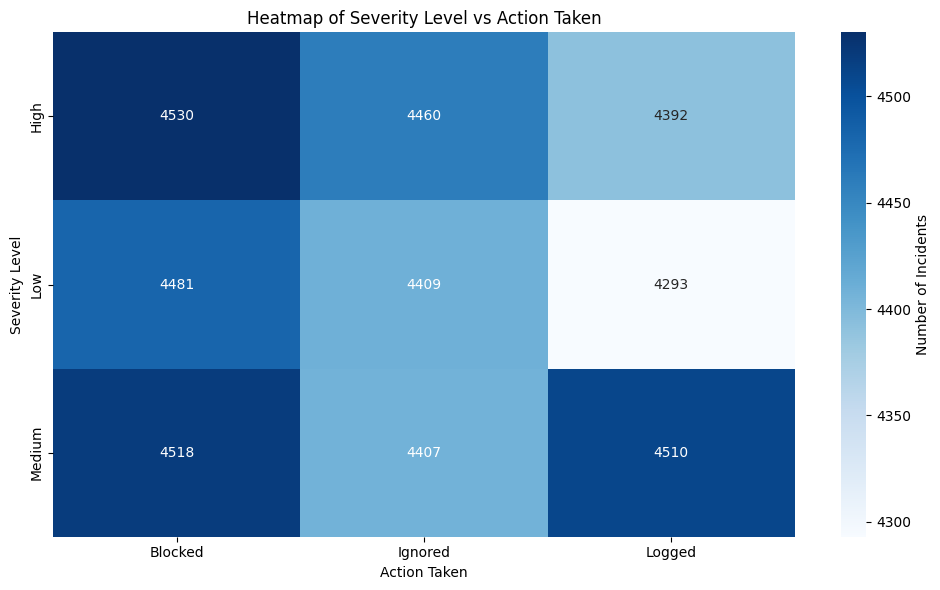

In [53]:
# Strip extra spaces from column names to avoid potential issues
df.columns = df.columns.str.strip()

# Group the data by 'Severity Level' and 'Action Taken' and count occurrences
severity_action_counts = df.groupby(['Severity Level', 'Action Taken']).size().reset_index(name='count')

# Display the grouped data
print("\nSeverity and Action Counts:")
print(severity_action_counts)

# Create a pivot table for heatmap visualization
pivot_table = severity_action_counts.pivot_table(index='Severity Level', columns='Action Taken', values='count', aggfunc='sum', fill_value=0)

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Incidents'})
plt.title('Heatmap of Severity Level vs Action Taken')
plt.ylabel('Severity Level')
plt.xlabel('Action Taken')
plt.tight_layout()
plt.show()



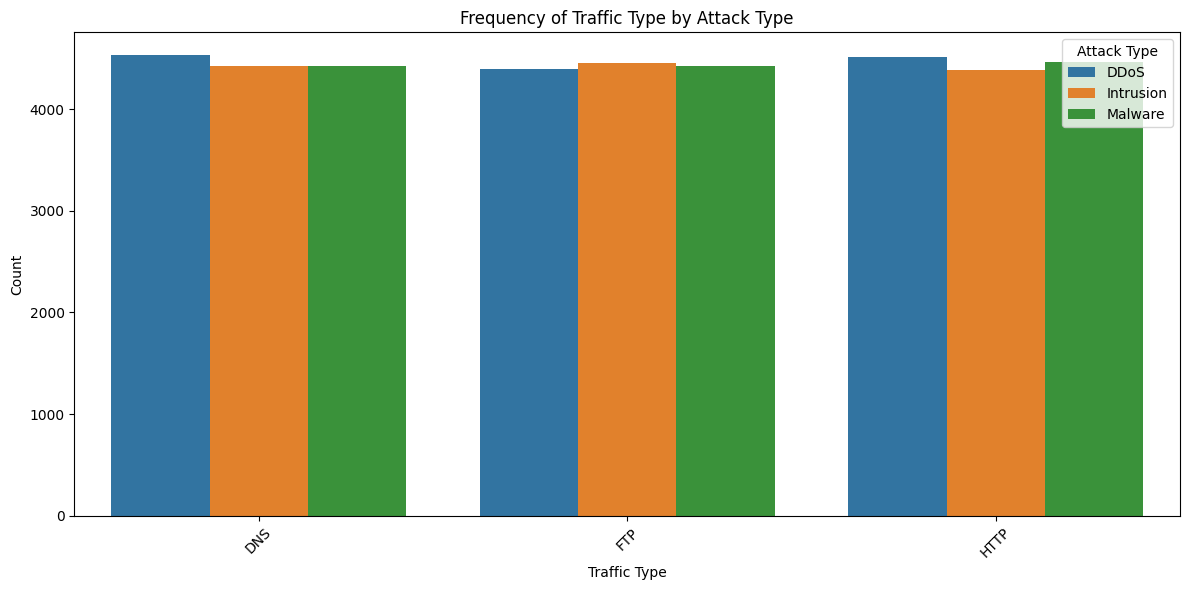


Traffic Type vs Attack Type Counts and Percentages:
  Traffic Type Attack Type  count  percentage
0          DNS        DDoS   4528     11.3200
1          DNS   Intrusion   4426     11.0650
2          DNS     Malware   4422     11.0550
3          FTP        DDoS   4389     10.9725
4          FTP   Intrusion   4453     11.1325
5          FTP     Malware   4422     11.0550
6         HTTP        DDoS   4511     11.2775
7         HTTP   Intrusion   4386     10.9650
8         HTTP     Malware   4463     11.1575


In [58]:
# Strip extra spaces from column names to avoid potential issues
df.columns = df.columns.str.strip()
# Count the occurrences of each combination of Traffic Type and Attack Type
traffic_attack_counts = df.groupby(['Traffic Type', 'Attack Type']).size().reset_index(name='count')

# Bar plot to show the frequency of Traffic Type by Attack Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Traffic Type', y='count', hue='Attack Type', data=traffic_attack_counts)
plt.title('Frequency of Traffic Type by Attack Type')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Calculate the counts of each combination of Traffic Type and Attack Type
traffic_attack_counts = df.groupby(['Traffic Type', 'Attack Type']).size().reset_index(name='count')
# Calculate the total number of incidents
total_incidents = traffic_attack_counts['count'].sum()
# Calculate the percentage of each combination
traffic_attack_counts['percentage'] = (traffic_attack_counts['count'] / total_incidents) * 100
# Display the counts and percentages
print("\nTraffic Type vs Attack Type Counts and Percentages:")
print(traffic_attack_counts)






Mean Anomaly Scores by Month:
    Month  Anomaly Scores
0       1       49.467442
1       2       50.057157
2       3       50.605171
3       4       50.049775
4       5       50.019360
5       6       49.823126
6       7       50.167693
7       8       50.152437
8       9       50.090391
9      10       49.973088
10     11       50.826197
11     12       50.261570


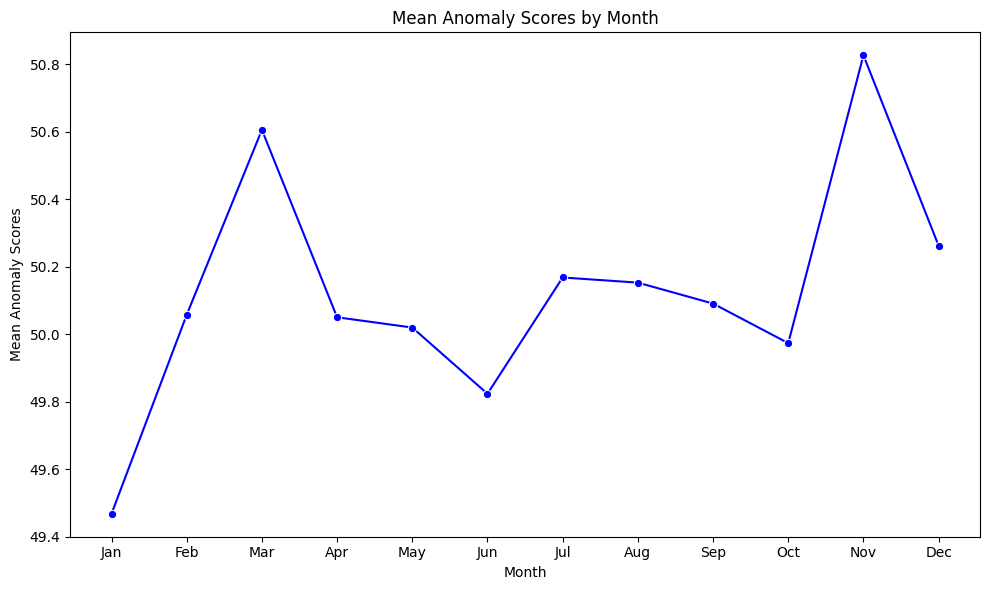

In [62]:
# Strip extra spaces from column names to avoid potential issues
df.columns = df.columns.str.strip()

# Convert the 'Timestamp' column to datetime format if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extract the month from the Timestamp
df['Month'] = df['Timestamp'].dt.month

# Calculate the mean anomaly scores for each month
monthly_anomaly_score = df.groupby('Month')['Anomaly Scores'].mean().reset_index()

# Display the mean anomaly scores per month
print("\nMean Anomaly Scores by Month:")
print(monthly_anomaly_score)

# Plotting the mean Anomaly Scores by Month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Anomaly Scores', data=monthly_anomaly_score, marker='o', linestyle='-', color='b')
plt.title('Mean Anomaly Scores by Month')
plt.xlabel('Month')
plt.ylabel('Mean Anomaly Scores')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


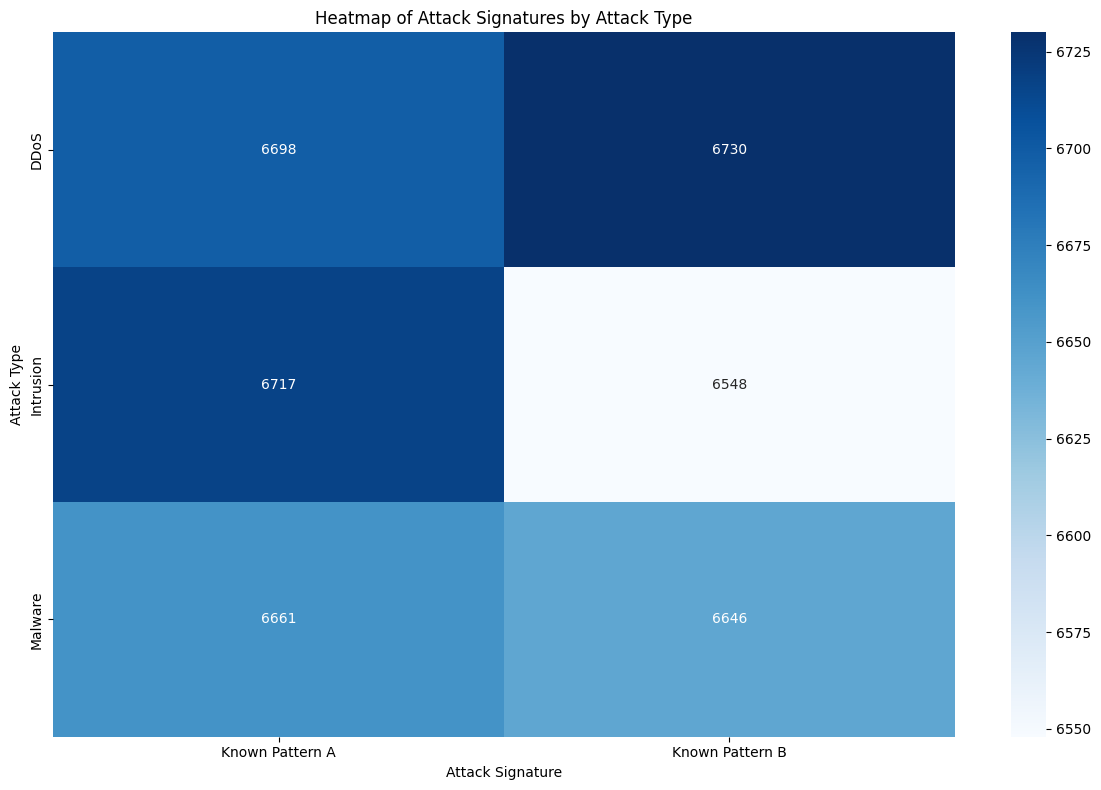

In [69]:
# Visualizing the relationship using a heatmap of Attack Signatures and Attack Types
attack_signature_matrix = pd.crosstab(df['Attack Type'], df['Attack Signature'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(attack_signature_matrix, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.title('Heatmap of Attack Signatures by Attack Type')
plt.xlabel('Attack Signature')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


